In [1]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
# gingham = loadAllTopicData('gingham')
# clarendon = loadAllTopicData('clarendon')
juno = loadAllTopicData('juno')
# lark = loadAllTopicData('lark')
# gotham = loadAllTopicData('gotham')
# reyes = loadAllTopicData('reyes')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)


In [2]:
def createDataPlaces(images, trainPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []


    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        imgList.append(images[c][:numTrain])

        featureVector = np.zeros((numTrain, categories))
        featureVector[:, c] = 1
        vectors.append(featureVector)
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
        testVectors.append(featureVector)


    X = np.vstack(imgList)
    y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)

    X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
    return X, y, Xtest, ytest
# X, y, Xtest, ytest = createDataPlaces([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9)
X, y, Xtest, ytest = createDataPlaces([origImg, juno], .9)

9000
9000


In [4]:
print(X.shape)
y.shape

(16200, 128, 128, 3)


(16200, 2)

In [5]:
Xsmall = []
ysmall = []
for i in range(X.shape[0]):
    l = 0
    for j in range(0, X.shape[1], X.shape[1] // 4):
        for k in range(0, X.shape[1], X.shape[1] // 4):
            block = X[i, j : j + 32, k : k + 32]
            Xsmall.append(block)
            ysmall.append(y[i])
            l += 1
Xsmall = np.array(Xsmall)
ysmall = np.array(ysmall)

In [6]:
Xsmall.shape

(259200, 32, 32, 3)

In [111]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.5))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.5))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
model.fit(Xsmall, ysmall, epochs=150, batch_size=128, validation_split=0.01)

Train on 256608 samples, validate on 2592 samples
Epoch 1/150
 45440/256608 [====>.........................] - ETA: 28s - loss: 5.4089 - acc: 0.6303

KeyboardInterrupt: 

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.fit(Xsmall, ysmall, epochs=150, batch_size=128, validation_split=0.01)

Train on 256608 samples, validate on 2592 samples
Epoch 1/150
 34304/256608 [===>..........................] - ETA: 30s - loss: 1.3212 - acc: 0.6842

KeyboardInterrupt: 

In [15]:
def createImageData(images, trainPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []


    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        imgList.append(images[c][:numTrain])

        featureVector = np.zeros((numTrain, categories))
        featureVector[:, c] = 1
#         vectors.append(featureVector)
        vectors.append(images[0][:numTrain])
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
#         testVectors.append(featureVector)
        testVectors.append(images[0][numTrain:])


    X = np.vstack(imgList)
    y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)

    X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
    return X, y, Xtest, ytest
# X, y, Xtest, ytest = createDataPlaces([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9)
imX, imy, imXtest, imytest = createImageData([origImg, juno], .9)

9000
9000


In [60]:
def divideImages(X, y):
    imXsmall = []
    imysmall = []
    for i in range(X.shape[0]):
        l = 0
        for j in range(0, X.shape[1], X.shape[1] // 4):
            for k in range(0, X.shape[1], X.shape[1] // 4):
                blockX = X[i, j : j + 32, k : k + 32]
                blocky = y[i, j : j + 32, k : k + 32]
                imXsmall.append(blockX)
                imysmall.append(blocky)
                l += 1
    imXsmall = np.array(imXsmall)
    imysmall = np.array(imysmall)
    return imXsmall, imysmall
imXsmall, imysmall = divideImages(imX, imy)
imXsmall, imysmall = shuffle(imXsmall, imysmall, random_state=0)

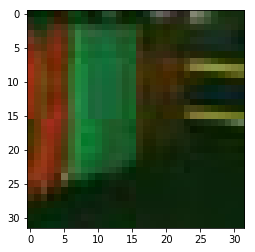

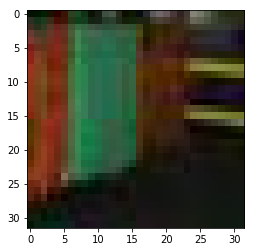

559172
[[  5   0   0 ... 239 239 236]
 [245 246 239 ... 239 241 237]
 [241 244 236 ... 237 241 239]
 ...
 [248 246 253 ... 250 248 248]
 [249 246   0 ... 248 250 249]
 [  2 250 253 ... 251 250 249]]


In [35]:
i = 442
plt.imshow(imXsmall[i])
plt.show()
plt.imshow(imysmall[i])
plt.show()
print(np.sum(np.abs(imXsmall[i] - imysmall[i])))
print(imsmallResidual[i][:,:, 0])

In [149]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Conv2DTranspose(32, (3, 3), strides = 2))
# model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [150]:
model.fit(Xsmall, ysmall, epochs=150, batch_size=128, validation_split=0.01)

Train on 256608 samples, validate on 2592 samples
Epoch 1/150
 86656/256608 [=========>....................] - ETA: 22s - loss: 0.7417 - acc: 0.7488

KeyboardInterrupt: 

In [85]:
np.mean(imsmallResidual)

67.64598745966154